In [1]:
#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
%matplotlib inline

#propios utilitarios
from utils import *

data_perfil = pd.read_csv('data/02dataBasePerfilRec.csv')
data_perfil.head()

,codCliente,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,24041,Rango2,Rango2,1,0,360.0,Rango1,Rango1,Rango1,1,NaN,NaN,NaN,NaN
1,9040,Rango4,Rango6,1,1,260.0,Rango1,Rango1,Rango1,1,Rango1,Rango1,Rango1,Rango1
2,18233,Rango2,Rango1,1,1,273.0,Rango1,Rango2,Rango1,1,Rango2,Rango1,Rango1,Rango1
3,7226,Rango5,Rango3,0,1,241.0,Rango1,Rango2,Rango1,1,Rango1,Rango2,Rango1,Rango2
4,21617,Rango3,Rango2,1,1,268.0,Rango1,Rango1,Rango1,0,NaN,NaN,NaN,NaN


In [2]:
null_verificator(data_perfil)

,Nulos,Cantidad,Tipo Col
codCliente,False,0,int64
rangoEdad,True,57,object
rangoIngreso,True,1263,object
flagGenero,False,0,int64
flagLimaProvCliente,False,0,int64
ubigeoCliente,True,4,float64
rangoCtdProdAct,False,0,object
rangoCtdProdPas,False,0,object
rangoCtdProdSeg,False,0,object
flagBxi,False,0,int64


In [3]:
data_perfil['rangoIngreso'].value_counts(dropna=False)

Rango1    11003
Rango3     5241
Rango2     4533
Rango6     3930
Rango4     2516
Rango5     1514
NaN        1263
Name: rangoIngreso, dtype: int64

In [4]:
data_perfil['saldoTcEntidad1'].value_counts(dropna=False)

Rango1    15429
NaN        6426
Rango3     2076
Rango2     1731
Rango4     1713
Rango6     1571
Rango5     1054
Name: saldoTcEntidad1, dtype: int64

In [6]:
data_perfil['saldoTcEntidad2'].value_counts(dropna=False)

Rango1    18084
NaN        6426
Rango2     2313
Rango3     1494
Rango5      949
Rango4      734
Name: saldoTcEntidad2, dtype: int64

In [7]:
data_perfil['saldoTcEntidad3'].value_counts(dropna=False)

Rango1    20718
NaN        6426
Rango6      729
Rango2      571
Rango3      561
Rango5      518
Rango4      477
Name: saldoTcEntidad3, dtype: int64

In [8]:
data_perfil['saldoTcEntidad4'].value_counts(dropna=False)

Rango1    18910
NaN        6426
Rango2     1096
Rango3      998
Rango6      975
Rango5      818
Rango4      777
Name: saldoTcEntidad4, dtype: int64

In [18]:
data_perfil['ubigeoCliente'].value_counts(dropna=False).sort_index()

 2.0        5
 3.0        1
 4.0        1
 5.0        3
 6.0       39
 7.0       23
 8.0        1
 9.0        2
 10.0       1
 11.0       1
 12.0       1
 13.0       1
 14.0       3
 15.0       1
 16.0       6
 17.0       1
 18.0       1
 19.0     127
 20.0       4
 21.0       1
 22.0       4
 23.0      99
 24.0       1
 25.0       4
 26.0       7
 27.0       1
 28.0       2
 29.0     135
 30.0      58
 31.0      96
         ... 
 391.0      1
 392.0    101
 393.0      1
 394.0     18
 395.0     31
 396.0      1
 397.0      4
 398.0    105
 399.0      6
 400.0      2
 401.0      1
 402.0      9
 403.0     28
 404.0      1
 405.0     47
 406.0      7
 407.0      1
 408.0      1
 409.0      1
 410.0      1
 411.0      1
 412.0      3
 413.0      2
 414.0    120
 415.0      1
 416.0     52
 417.0     13
 418.0      2
 419.0      1
NaN         4
Name: ubigeoCliente, Length: 419, dtype: int64

In [19]:
data_perfil['ubigeoCliente'].fillna(999.0, inplace=True)

In [20]:
for col in [_ for _ in data_perfil.columns if data_perfil[_].isnull().any()]:
    print(col)
    data_perfil[col].fillna('Rango0', inplace=True)

rangoEdad
rangoIngreso
saldoTcEntidad1
saldoTcEntidad2
saldoTcEntidad3
saldoTcEntidad4


In [21]:
null_verificator(data_perfil)

'DATA LIMPIA DE NULOS'

In [22]:
data_perfil.dtypes

codCliente               int64
rangoEdad               object
rangoIngreso            object
flagGenero               int64
flagLimaProvCliente      int64
ubigeoCliente          float64
rangoCtdProdAct         object
rangoCtdProdPas         object
rangoCtdProdSeg         object
flagBxi                  int64
saldoTcEntidad1         object
saldoTcEntidad2         object
saldoTcEntidad3         object
saldoTcEntidad4         object
dtype: object

In [29]:
data_perfil.select_dtypes(include=['object']).head()

,rangoEdad,rangoIngreso,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,Rango2,Rango2,Rango1,Rango1,Rango1,Rango0,Rango0,Rango0,Rango0
1,Rango4,Rango6,Rango1,Rango1,Rango1,Rango1,Rango1,Rango1,Rango1
2,Rango2,Rango1,Rango1,Rango2,Rango1,Rango2,Rango1,Rango1,Rango1
3,Rango5,Rango3,Rango1,Rango2,Rango1,Rango1,Rango2,Rango1,Rango2
4,Rango3,Rango2,Rango1,Rango1,Rango1,Rango0,Rango0,Rango0,Rango0


In [30]:
columnas_rango = list(data_perfil.select_dtypes(include=['object']).columns)
columnas_rango

['rangoEdad',
 'rangoIngreso',
 'rangoCtdProdAct',
 'rangoCtdProdPas',
 'rangoCtdProdSeg',
 'saldoTcEntidad1',
 'saldoTcEntidad2',
 'saldoTcEntidad3',
 'saldoTcEntidad4']

In [36]:
for col in columnas_rango:
    data_perfil[col] = data_perfil[col].apply(lambda x: int(x[-1]))

In [37]:
data_perfil.head()

,codCliente,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,24041,2,2,1,0,360.0,1,1,1,1,0,0,0,0
1,9040,4,6,1,1,260.0,1,1,1,1,1,1,1,1
2,18233,2,1,1,1,273.0,1,2,1,1,2,1,1,1
3,7226,5,3,0,1,241.0,1,2,1,1,1,2,1,2
4,21617,3,2,1,1,268.0,1,1,1,0,0,0,0,0


In [38]:
data_perfil.dtypes

codCliente               int64
rangoEdad                int64
rangoIngreso             int64
flagGenero               int64
flagLimaProvCliente      int64
ubigeoCliente          float64
rangoCtdProdAct          int64
rangoCtdProdPas          int64
rangoCtdProdSeg          int64
flagBxi                  int64
saldoTcEntidad1          int64
saldoTcEntidad2          int64
saldoTcEntidad3          int64
saldoTcEntidad4          int64
dtype: object

In [39]:
data_perfil = reduce_size_data(data_perfil, category=False, default='integer')

Tamaño de uso actual :  3.2044219970703125 MB
-> Int 64 Detected
     codCliente
     rangoEdad
     rangoIngreso
     flagGenero
     flagLimaProvCliente
     rangoCtdProdAct
     rangoCtdProdPas
     rangoCtdProdSeg
     flagBxi
     saldoTcEntidad1
     saldoTcEntidad2
     saldoTcEntidad3
     saldoTcEntidad4
-> Float 64 Detected
     ubigeoCliente
Tamaño de uso final :  0.4578399658203125 MB


In [40]:
data_perfil.dtypes

codCliente             int16
rangoEdad               int8
rangoIngreso            int8
flagGenero              int8
flagLimaProvCliente     int8
ubigeoCliente          int16
rangoCtdProdAct         int8
rangoCtdProdPas         int8
rangoCtdProdSeg         int8
flagBxi                 int8
saldoTcEntidad1         int8
saldoTcEntidad2         int8
saldoTcEntidad3         int8
saldoTcEntidad4         int8
dtype: object

In [41]:
data_perfil.head()

,codCliente,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,24041,2,2,1,0,360,1,1,1,1,0,0,0,0
1,9040,4,6,1,1,260,1,1,1,1,1,1,1,1
2,18233,2,1,1,1,273,1,2,1,1,2,1,1,1
3,7226,5,3,0,1,241,1,2,1,1,1,2,1,2
4,21617,3,2,1,1,268,1,1,1,0,0,0,0,0


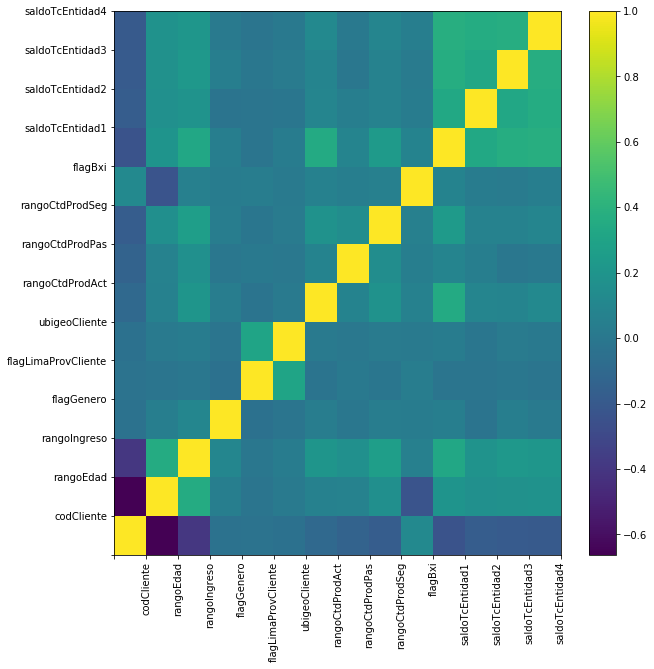

In [57]:
cols = [''] + list(data_perfil.columns)
plt.figure(figsize=[10, 10])
plt.pcolor(data_perfil.corr())
plt.xticks(range(len(cols)), cols, rotation='vertical')
plt.yticks(range(len(cols)), cols)
plt.colorbar()
plt.show()

In [55]:
data_perfil.corr()

,codCliente,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
codCliente,1.000000,-0.661671,-0.396288,-0.034733,-0.026993,-0.040531,-0.098498,-0.140958,-0.180409,0.118007,-0.238301,-0.178762,-0.189569,-0.197596
rangoEdad,-0.661671,1.000000,0.354783,0.043015,-0.015214,0.016725,0.064096,0.068701,0.157673,-0.227712,0.201372,0.163962,0.173833,0.186608
rangoIngreso,-0.396288,0.354783,1.000000,0.101227,0.000256,0.029271,0.202273,0.169088,0.261533,0.055206,0.327181,0.190056,0.226064,0.211945
flagGenero,-0.034733,0.043015,0.101227,1.000000,-0.039169,-0.014076,0.035698,-0.004684,0.037725,0.027286,0.044462,-0.019420,0.039527,0.017322
flagLimaProvCliente,-0.026993,-0.015214,0.000256,-0.039169,1.000000,0.310789,-0.024314,0.010821,-0.008502,0.035498,-0.016573,-0.017492,-0.004951,-0.016210
ubigeoCliente,-0.040531,0.016725,0.029271,-0.014076,0.310789,1.000000,0.019309,0.006002,0.022727,0.019265,0.031731,-0.007302,0.021625,0.008288
rangoCtdProdAct,-0.098498,0.064096,0.202273,0.035698,-0.024314,0.019309,1.000000,0.079029,0.179691,0.059256,0.346380,0.096943,0.086557,0.118034
rangoCtdProdPas,-0.140958,0.068701,0.169088,-0.004684,0.010821,0.006002,0.079029,1.000000,0.149533,0.043865,0.088135,0.042358,-0.005237,0.007989
rangoCtdProdSeg,-0.180409,0.157673,0.261533,0.037725,-0.008502,0.022727,0.179691,0.149533,1.000000,0.053064,0.235911,0.075358,0.069571,0.094442
flagBxi,0.118007,-0.227712,0.055206,0.027286,0.035498,0.019265,0.059256,0.043865,0.053064,1.000000,0.081220,0.031025,0.023078,0.039404
